In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from heatmap import heatmap, corrplot

In [3]:
#load data from pkl files
def data_load(code = 0):
    return pd.read_pickle('event_'+str(code)+'_data.pkl')
#load data from all dataset
data_modified = pd.read_csv('dataset_modified.csv')

In [4]:
features_time       = np.array(['begin','end','event'])
features_sensor     = data_modified['type'].unique()
features_sensor.sort()
features = np.concatenate([features_sensor,features_time],axis=0)
train_input = pd.DataFrame(columns = features_sensor)
train_input

,AD1-A,AD1-B,AD1-C,D03,D05,D07,D08,D09,D10,D12,...,M42,M43,M44,M45,M46,M47,M48,M49,M50,M51


In [5]:
#each day each activity
def train_data_prepare(mat,code = 0):
    data = data_load(code)
    #event list
    begin_point = data['BE'].str.contains('begin').fillna(False)
    end_point   = data['BE'].str.contains('end').fillna(False)

    index_begin         = data.loc[begin_point].index
    index_end           = data.loc[end_point].index
    only_event_begin    = data.loc[index_begin]
    only_event_end      = data.loc[index_end]

    event_begin         = only_event_begin.loc[data['location'].str.contains(data.head(1)['location'].values[0]).fillna(False)]
    event_end           = only_event_end.loc[data['location'].str.contains(data.head(1)['location'].values[0]).fillna(False)]

    for i in range(len(event_begin)):
        #single event sensor data
        sensor_event            = data.loc[event_begin.index[i]:event_end.index[i]]
        sensor_event_count      = sensor_event['type'].value_counts()
        sensor_values           = sensor_event_count.sort_values()
        #sensor_sum              = sensor_values.sum()
        #sensor_values           = sensor_values/sensor_sum

        #single event time data
        hour_begin  = int(event_begin['time'].values[i][0:2])
        hour_end    = int(event_end['time'].values[i][0:2])

        #put observation into matrix
        #sensor_values = pd.concat([sensor_values,pd.Series([hour_begin/24,hour_end/24,str(code)],index = ['begin','end','event'])])
        single_obs = pd.DataFrame(sensor_values).transpose()
        mat = pd.concat((mat,single_obs),axis=0)
        pass

    mat = mat.fillna(0)
    mat = mat.reset_index(drop=True)
    return mat

In [6]:
train = []
for i in range(13):
    print(i)
    mat = train_data_prepare(train_input,i)
    train.append(mat)
    pass

0
1
2
3
4
5
6
7
8
9
10
11
12


In [7]:
train_df = pd.concat(train)
train_df = train_df.reset_index(drop=True)
train_df.head(1)

,AD1-A,AD1-B,AD1-C,D03,D05,D07,D08,D09,D10,D12,...,M42,M43,M44,M45,M46,M47,M48,M49,M50,M51
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


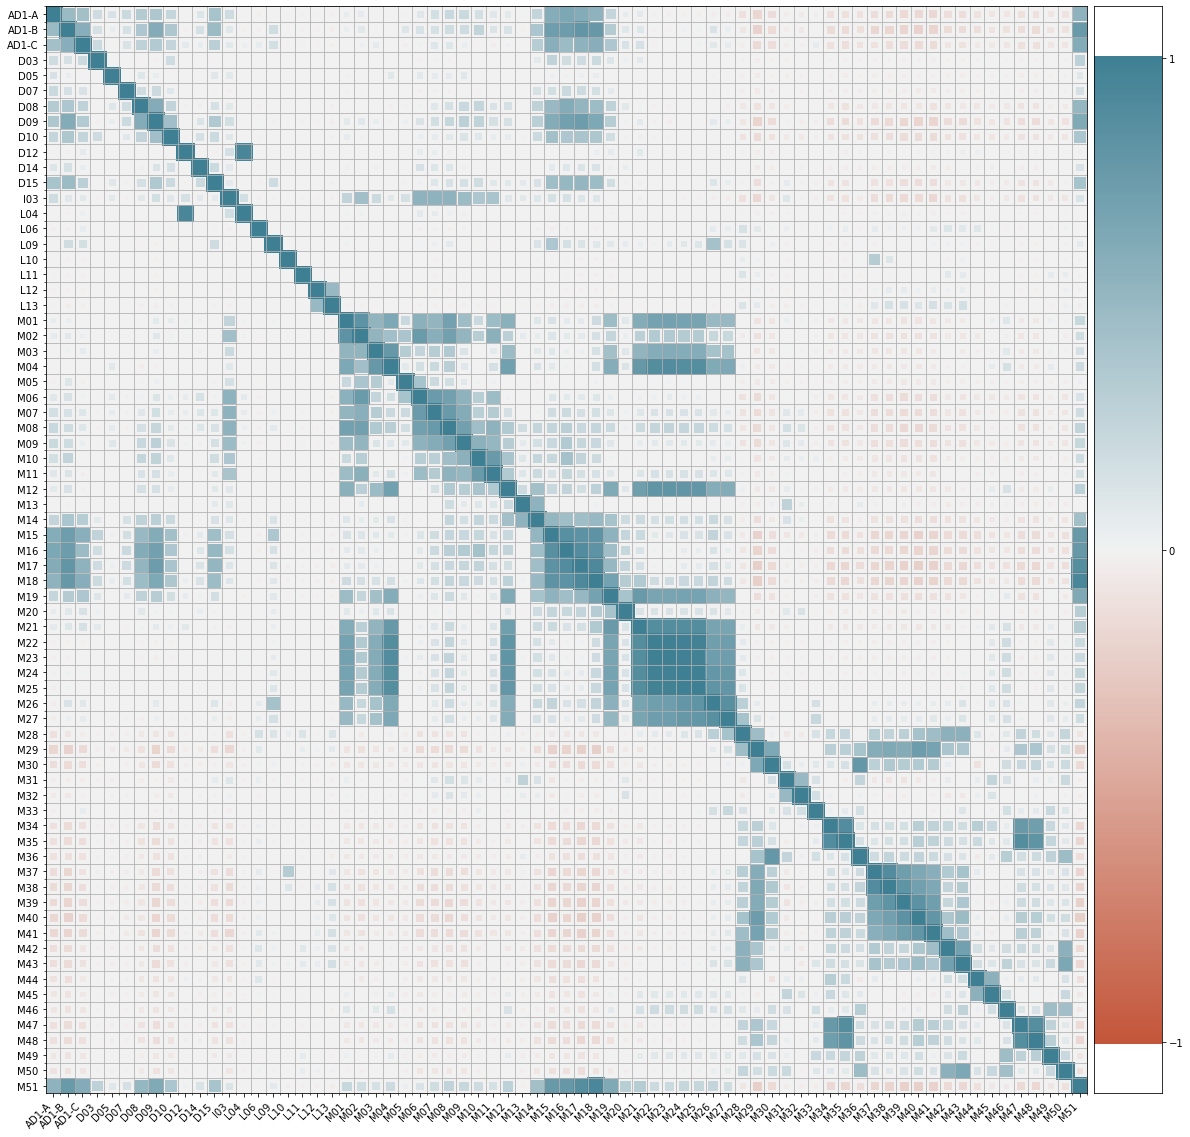

In [8]:
plt.figure(figsize=(20,20))
corrplot(train_df.corr(), size_scale=300)